In [25]:
import seaborn as sns
import pandas as pd
import statistics as st

In [26]:
df = pd.read_csv("D:\Data_Sets\Google-Playstore-32K.csv")
df.head(7)

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content_Rating,Last_Updated,Minimum_Version,Latest_Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device
5,Safeway Online Shopping,FOOD_AND_DRINK,3.82532239,2559.0,"100,000+",23M,0,Everyone,29-Mar-19,5.0 and up,7.6.0
6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267267704,421918.0,"10,000,000+",Varies with device,0,Teen,28-Mar-19,Varies with device,Varies with device


In [27]:
#check the number of missing values
df.isnull().sum()

App_Name           0
Category           0
Rating             0
Reviews            7
Installs           0
Size               0
Price              0
Content_Rating     0
Last_Updated       0
Minimum_Version    0
Latest_Version     1
dtype: int64

In [28]:
def abc(series):
    return series.fillna(st.median(series))



#command to fill the empty cells
df.Reviews = df["Reviews"].transform(abc)

In [29]:
def xyz(series):
    return series.fillna(st.mode(series))



#command to fill the empty cells
df.Latest_Version = df["Latest_Version"].transform(xyz)

In [30]:
#again checking number of missing values
#and there are no empty cells in the Reviews and Latest_Version Column
df.isnull().sum()

App_Name           0
Category           0
Rating             0
Reviews            0
Installs           0
Size               0
Price              0
Content_Rating     0
Last_Updated       0
Minimum_Version    0
Latest_Version     0
dtype: int64

In [31]:
#Now all the NA values are removed,so now we will clean the data

In [32]:
outlier1 = df[df.Installs == "EDUCATION"]
outlier1

,App_Name,Category,Rating,Reviews,Installs,Size,Price,Content_Rating,Last_Updated,Minimum_Version,Latest_Version
6941,ELer Japanese - NHK News,Podcasts,Lessons,3490176.0,EDUCATION,4.705075264,1458,"100,000+",9.5M,0,Everyone


In [33]:
df.drop([6941],inplace=True)

In [34]:
df["Installs"] = df["Installs"].apply(lambda x: str(x).replace("+","") if "+" in str(x) else str(x))
df["Installs"] = df["Installs"].apply(lambda x: str(x).replace(",","") if "," in str(x) else str(x))
df["Installs"] = df["Installs"].apply(lambda x: float(x))

In [35]:
outlier2 = df.index[df.Price == "2.4M"]
outlier3 = df.index[df.Price=="Varies with device"]
print(outlier2)
print(outlier3)

Int64Index([13504], dtype='int64')
Int64Index([23457], dtype='int64')


In [36]:
df.drop([13504],inplace=True)
df.drop([23457],inplace=True)

In [37]:
df["Price"] = df["Price"].apply(lambda x: str(x).replace("$","") if "$" in str(x) else str(x))
df["Price"] = df["Price"].apply(lambda x: float(x))

In [38]:
df["Rating"] = df["Rating"].apply(lambda x: float(x))

In [39]:
df.dtypes

App_Name            object
Category            object
Rating             float64
Reviews            float64
Installs           float64
Size                object
Price              float64
Content_Rating      object
Last_Updated        object
Minimum_Version     object
Latest_Version      object
dtype: object

In [40]:
#Reviews was already a float data type,but now we have cleaned the data and converted Installs and Price also to float data

In [41]:
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
logmodel = LogisticRegression()

In [42]:
df1 = df[["Rating","Reviews","Installs","Price"]]
df1

,Rating,Reviews,Installs,Price
0,4.548562,305034.0,5000000.0,0.00
1,4.400671,1207922.0,100000000.0,0.00
2,3.656329,1967.0,100000.0,0.00
3,4.107233,389154.0,10000000.0,0.00
4,4.647752,2291.0,10000.0,5.99
...,...,...,...,...
31995,4.500000,8.0,50.0,0.00
31996,3.521127,71.0,10000.0,0.00
31997,3.994589,924.0,100000.0,0.00
31998,4.250000,1796.0,100000.0,0.00


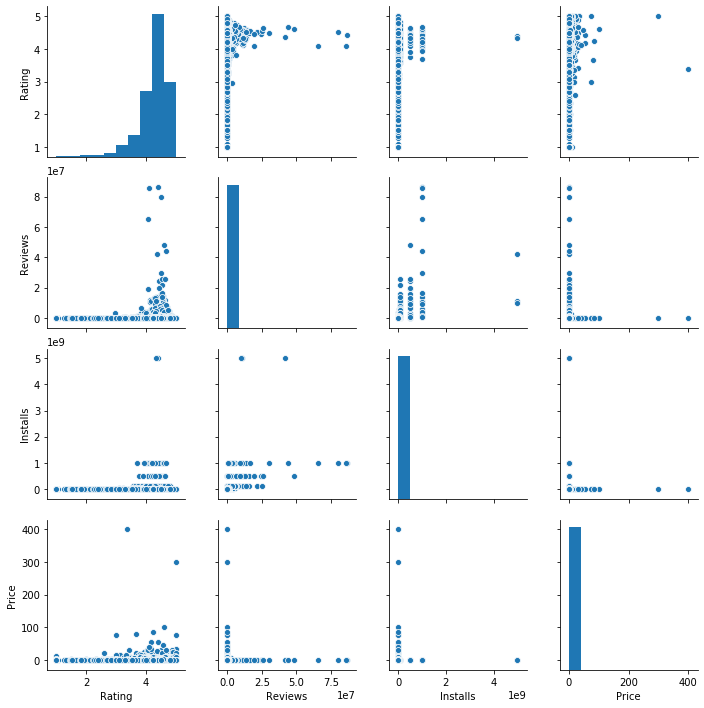

In [43]:
sns.pairplot(df1)

In [44]:
#To predict the price of an application

In [45]:
x = df[["Rating","Reviews","Installs","Price"]]
y = df[["Content_Rating"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=106)
logmodel.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
logmodel.coef_

array([[-1.14640694e+00, -2.35291570e-07, -9.86508151e-06,
        -1.27601571e-01],
       [ 9.21679902e-11,  4.87969749e-08,  3.05257447e-09,
         6.11924134e-12],
       [-2.12308902e-09,  5.74568524e-07, -2.96819358e-07,
        -1.66933865e-10],
       [-1.03526971e-06,  6.89645021e-08, -6.10094310e-07,
        -9.08447359e-08],
       [-3.82655130e-10, -3.45094952e-07, -4.85018139e-09,
        -2.77162248e-11],
       [-9.12159645e-01, -2.81225007e-02,  4.53389694e-07,
        -7.19816336e-02]])

In [47]:
logmodel.intercept_

array([-2.91503153e-01,  2.16211949e-11, -4.98270294e-10, -2.42842189e-07,
       -8.97798426e-11, -2.38384922e-01])

In [48]:
# Getting predictions from the model 
predictions = logmodel.predict([[4.647752285,2291,10000,5.99]])
predictions

array(['Everyone'], dtype=object)

In [49]:
predictions = logmodel.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
print(accuracy_score(y_test, predictions ))

0.85375


In [52]:
#So the model is complete with an accuracy score of 0.85375
#So by using the Logistic Regression Model we deviced a prediction model to estimate the Content Rating of an app